# Question 7 : Decision Tree

Train and fine-tune a decision tree for the moons dataset by following these steps:

1. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
2. Use train_test_split() to split the dataset into a training set and a test set.
3. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.
4. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.


## Imports

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.tree import export_text
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

# Generate a moons dataset


1. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
# returns always X with 2 features
# X : ndarray of shape (n_samples, 2)

In [3]:
X

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [4]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [5]:
print("Shape of X: ", X.shape) # 10000 datapoints, 2 features
print("Shape of y: ", y.shape)

Shape of X:  (10000, 2)
Shape of y:  (10000,)


In [6]:
# to define axis
print("Min of X1: ", min(X[0]))
print("Max of X1: ", max(X[0]))
print("Min of X2: ", min(X[1]))
print("Max of X2: ", max(X[1]))

Min of X1:  0.12230559409114666
Max of X1:  0.9402913990289846
Min of X2:  -0.4247754583126899
Max of X2:  0.12454025871102503


In [7]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", markersize = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", markersize = 0.5)
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

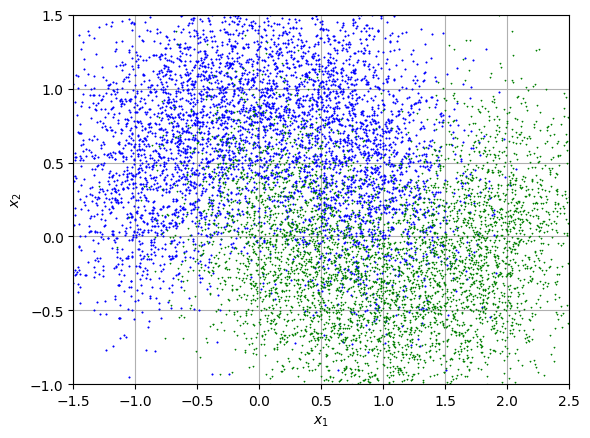

In [8]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## Preprocess the data

2. Use train_test_split() to split the dataset into a training set and a test set.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% - training set
# 20% - test set

In [10]:
print("Shape of inputs in the training set: ", X_train.shape)
print("Shape of inputs in the test set: ", X_test.shape)
print("Shape of labels in the training set: ", y_train.shape)
print("Shape of labels in the test set: ", y_test.shape)

Shape of inputs in the training set:  (8000, 2)
Shape of inputs in the test set:  (2000, 2)
Shape of labels in the training set:  (8000,)
Shape of labels in the test set:  (2000,)


In [11]:
# without hyperparameter-tuning what is the accuracy
tree_clf_v0 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_v0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
test_pred_decision_tree = tree_clf_v0.predict(X_test)
test_pred_decision_tree

array([1, 1, 0, ..., 0, 0, 0])

In [13]:
# directly calculating : score = decision_tree.score(labels, predictions)
score = accuracy_score(y_test, test_pred_decision_tree)
score 

0.863

In [14]:
# cross validation
cross_val_score(tree_clf_v0, X_train, y_train, cv=3, scoring="accuracy")

array([0.84214473, 0.85939258, 0.85596399])

In [15]:
# confusion matrix
y_train_pred = cross_val_predict(tree_clf_v0, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[3344,  643],
       [ 537, 3476]])

In [16]:
# for later
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

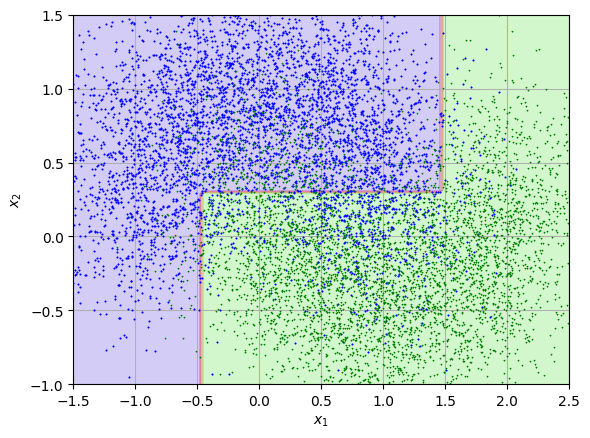

In [17]:
axes = [-1.5, 2.5, -1, 1.5]
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(tree_clf_v0, axes)
plt.show()

### Tree Diagram

In [18]:
feature_names=["X1", "X2"]
class_names= ["0","1"]

export_graphviz(
tree_clf_v0,
out_file="tree.dot",
feature_names= feature_names,
class_names= class_names,
rounded=True,
filled=True
)

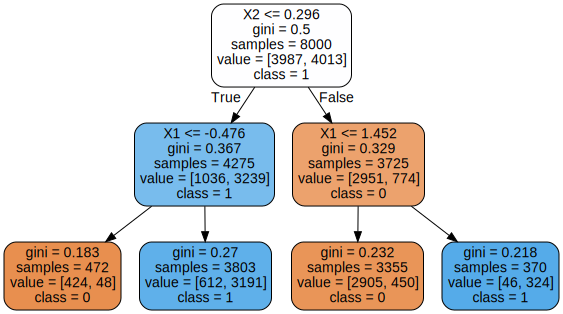

In [19]:
Source.from_file("tree.dot")

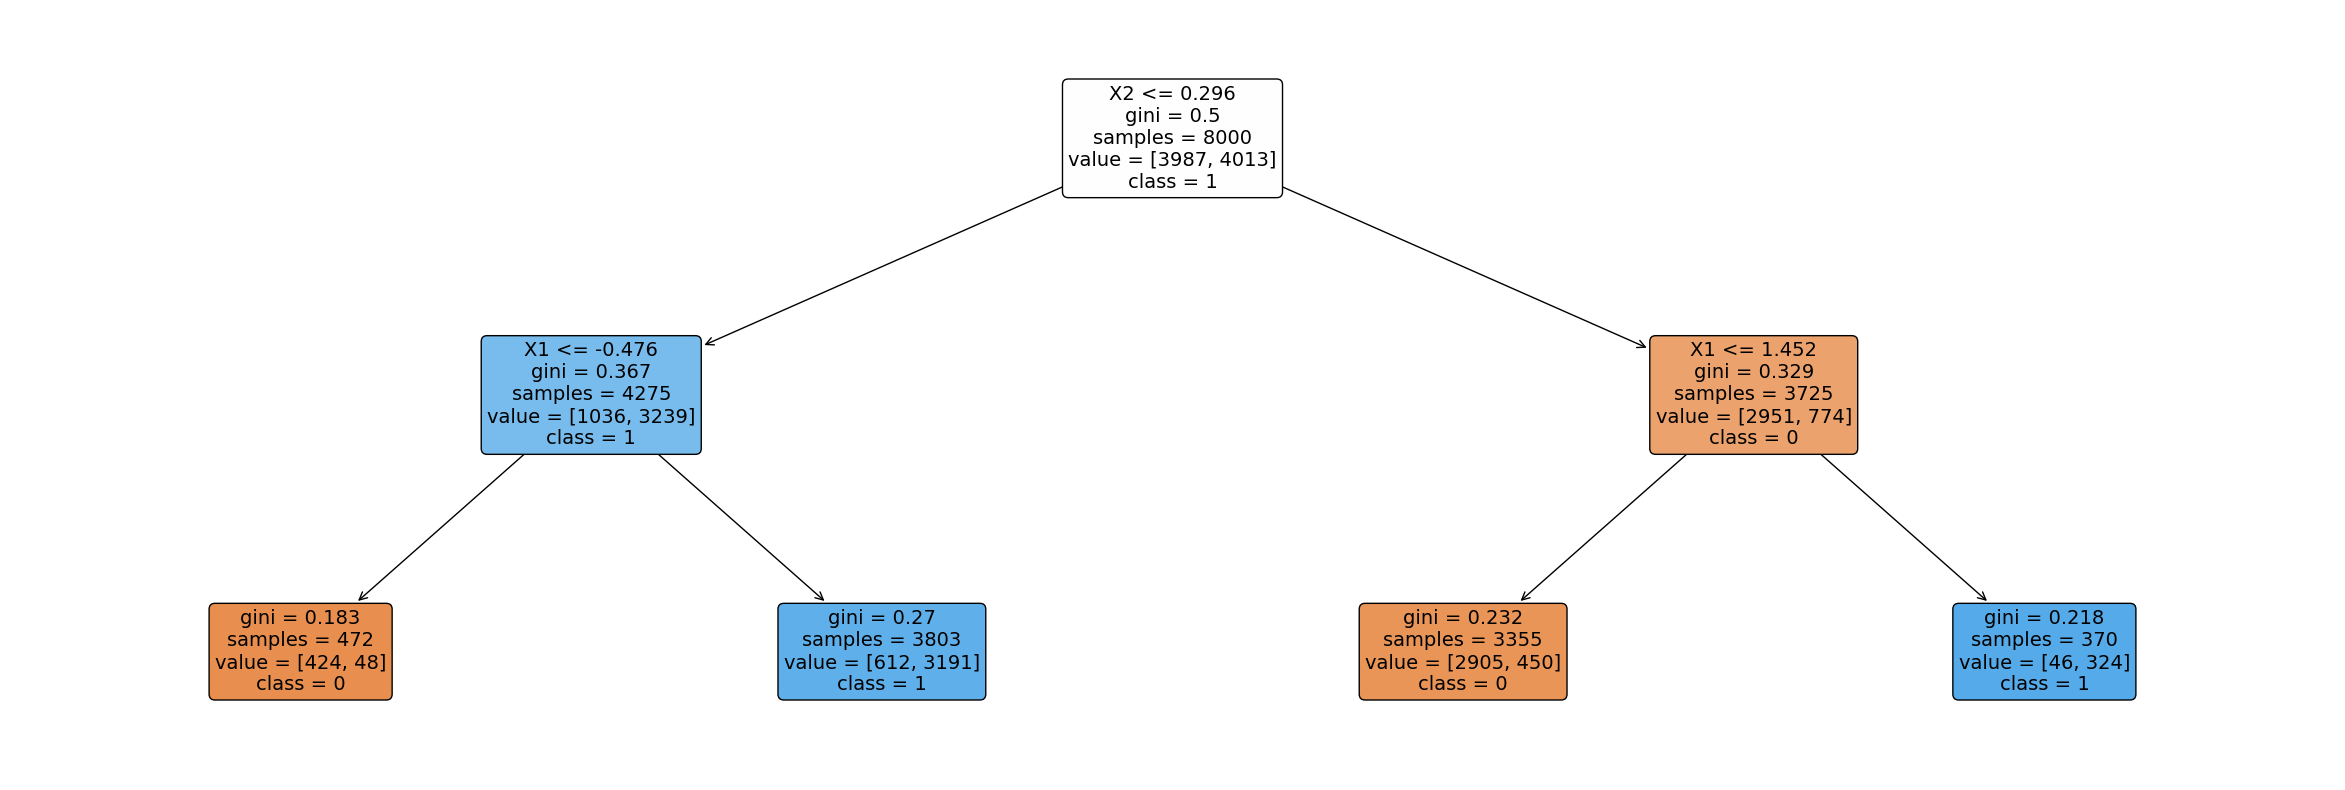

In [20]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')

#create the tree plot
a = tree.plot_tree(tree_clf_v0,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = class_names,
                   rounded = True,
                   filled = True,
                   fontsize=14)

#show the plot
plt.show()

### Text-based Diagram

In [21]:
#export the decision rules
tree_rules = export_text(tree_clf_v0,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- X2 <= 0.30
|   |--- X1 <= -0.48
|   |   |--- class: 0
|   |--- X1 >  -0.48
|   |   |--- class: 1
|--- X2 >  0.30
|   |--- X1 <= 1.45
|   |   |--- class: 0
|   |--- X1 >  1.45
|   |   |--- class: 1



## GridSearch

3. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.

In [22]:
param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

tree_clf = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(tree_clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [23]:
grid_search.best_params_

{'max_depth': 6, 'max_leaf_nodes': 17, 'min_samples_split': 2}

In [24]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

In [25]:
grid_search.best_score_

0.8541253704877287

## Train the model

4. Train it on the full training set using these hyperparameters, and measure your model’s performance on the test set. You should get roughly 85% to 87% accuracy.

In [26]:
best_tree_clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, min_samples_split = 2, random_state=42)
best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

## Measure the performance of the model on the test set

In [27]:
test_pred_decision_best_tree = best_tree_clf.predict(X_test)
test_pred_decision_best_tree

array([1, 1, 0, ..., 0, 0, 0])

In [28]:
score = accuracy_score(y_test, test_pred_decision_best_tree)
score 

0.8595

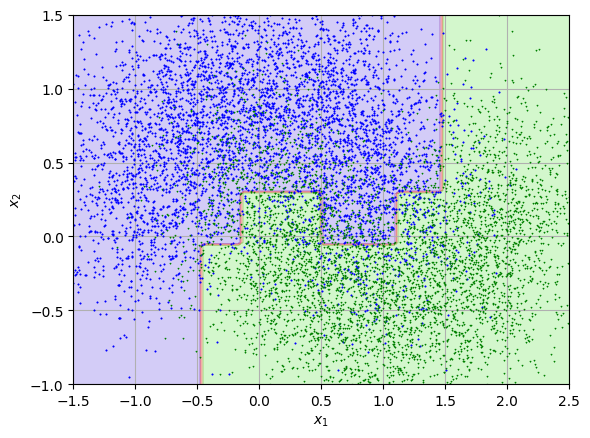

In [29]:
axes = [-1.5, 2.5, -1, 1.5]
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(best_tree_clf, axes)
plt.show()

In [30]:
# confusion matrix
y_train_pred_best = cross_val_predict(best_tree_clf, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred_best)
cm

array([[3403,  584],
       [ 583, 3430]])

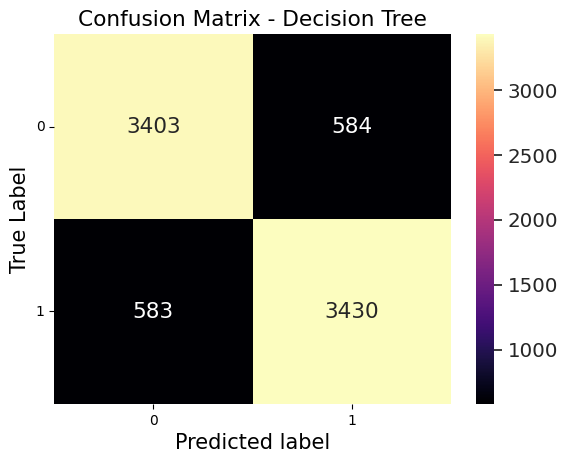

<Figure size 1000x700 with 0 Axes>

In [31]:
#turn this into a dataframe
matrix_df = pd.DataFrame(cm)

#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(list(class_names))
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(class_names), rotation = 0)
plt.show()

In [32]:
print(metrics.classification_report(y_train,y_train_pred_best))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3987
           1       0.85      0.85      0.85      4013

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



# Question 8 : RandomForest

Grow a forest by following these steps:

1. Continuing the previous exercise, generate 1,000 subsets of the training set,each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

2. Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.

3. Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

4. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

## Imports

In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode

## Generate subsets

1. Continuing the previous exercise, generate 1,000 subsets of the training set,each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

In [34]:
X_train.shape

(8000, 2)

In [35]:
n_trees = 1000
n_instances = 100
# test_size = 7900, because of that training_size = 100
rs = ShuffleSplit(n_splits = n_trees, test_size = len(X_train) - n_instances,
                  random_state=42)
rs

ShuffleSplit(n_splits=1000, random_state=42, test_size=7900, train_size=None)

In [36]:
rs.split(X_train) # Generate indices to split data into training and test set.

<generator object BaseShuffleSplit.split at 0x7f9a032aa740>

In [37]:
mini_sets = []
i = 0
for mini_train_index, mini_test_index in rs.split(X_train):
    if(i % 100 == 0) : 
      print("Shape of subset : ", len(mini_train_index))
      print("Random indexes of subsets : \n",mini_train_index)
      print("-----------------------------")
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    # add subsets
    mini_sets.append((X_mini_train, y_mini_train))
    i+=1

Shape of subset :  100
Random indexes of subsets : 
 [4798 1500 3843 5225 2613 3461 1021 3073 7555 3943 1585 1955 3152 6349
   34 4014  775 2556 7595 1478 7099 5486 6235 1363 7041 2612 7513 2824
 2041  241 2061 2363  600 2435 5393 6310 2888 6164  646 3890 3556 3202
 1528 6975 1267 7734 1899 4658 3005 2734 7101  189 1806  975 2747 7643
 2047 7849 2558 1082  474 7728 2904 4843 6396 4117 3385 4555 1184 6420
 5051 5311 2433 6949 7581 5611 2391  769 7476 1685  130 7831 2919 3171
 3444 6231 5578 4426 5334  466 6265 5734 3092 3772 5191 5226 5390  860
 7603 7270]
-----------------------------
Shape of subset :  100
Random indexes of subsets : 
 [ 933 5225 1208 4310 4598 5260 5706 2474 6780 7729 6788 4739 3276 7203
 5643 2756 2697 6250 2139 2934 6812 1579 2196 3723 7896 2050 1005 6537
 1671 1167 7020 6306 7962 3643 3083 4996 7390 4980 4923 6719 7041 4632
 2713 5774 3872 4593 2942 1141 2171  646 3366 5544 1385 6535 7777 4818
 6330 5112 4775 7988 5867 3299 2398 3360 5825 6500 7048 5791  493 2581


In [38]:
len(X_mini_train)

100

In [39]:
len(y_mini_train)

100

In [40]:
len(mini_sets)

1000

## Train decision trees

2. Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.

In [41]:
forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]
forest
# DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

[DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, m

In [42]:
len(forest) # 1000 desicion tree

1000

In [43]:
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores) # trained on smaller sets(100 instances) = smaller accuracy

0.8056605

## Generate predictions

3. Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

In [44]:
# np.empty : Return a new array of given shape and type, 
# without initializing entries.(arbitrary data)
# shape = [n_trees, len(X_test)] 
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)
Y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
len(X_test)

2000

In [46]:
Y_pred.shape

(1000, 2000)

In [47]:
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [48]:
Y_pred

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
Y_pred[0].shape # prediction of the first desicion tree for 2000 test instances

(2000,)

In [50]:
Y_pred[0]

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [51]:
# mode : Return an array of the modal (most common) 
# value in the passed array.
# most frequent prediction 
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0) # get mode of each column

<ipython-input-51-39bd63b33f3c>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority_votes, n_votes = mode(Y_pred, axis=0) # get mode of each column


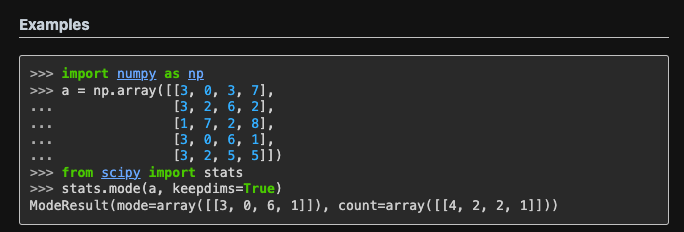

* Her test instance ı için 0 mı yoksa 1 mi label ı en çok kullanılmış ve kaç kere kullanılmış onu veriyor.

In [52]:
y_pred_majority_votes # array of modal values

array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [53]:
y_pred_majority_votes.shape # 2000 test instances

(1, 2000)

In [54]:
n_votes # Array of counts for each mode.  1 'den 949 tane varmış, 1000 tane ağacımız var 949 u 1 tahmin etmiş 

array([[949, 908, 963, ..., 918, 993, 615]])

In [55]:
n_votes.shape

(1, 2000)

## Evaluate

4. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

In [56]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873